In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def connect_db():
    return sqlite3.connect('orienteering.db')

##club with most active runners

In [21]:

db = connect_db()
cursor = db.cursor()

date_runner_type = cursor.execute("SELECT date, runners, classification FROM competitions").fetchall()
gender = cursor.execute('SELECT gender, COUNT(*) FROM runners GROUP BY gender').fetchall()
club = cursor.execute('SELECT club, COUNT(*) FROM runners GROUP BY club').fetchall()
gender_violin =cursor.execute("SELECT age, gender FROM runners").fetchall()
x = cursor.execute("SELECT gender, club FROM runners").fetchall()
y = cursor.execute("SELECT club, COUNT(DISTINCT reg_number) AS num_runners, SUM(num_competitions) / 7.0 AS avg_competitions_per_year FROM runners GROUP BY club").fetchall()
club_data = cursor.fetchall()
classification_counts = cursor.execute('''
            SELECT strftime('%Y', date) AS year,
                   classification,
                   COUNT(*) AS count
            FROM competitions
            GROUP BY year, classification
            ORDER BY year
        ''').fetchall()
city_info = cursor.execute("SELECT lat, lng FROM cities WHERE city = ?", ("Pezinok",)).fetchone()
club_cities = cursor.execute("SELECT city FROM clubs").fetchall()
club_adress = cursor.execute("SELECT city FROM clubs").fetchall()
club_info = cursor.execute("SELECT city, members  FROM clubs").fetchall()
g=cursor.execute('SELECT name, members FROM clubs WHERE shortcut = ?', ("SPE",)).fetchone()

query = """
        SELECT club,
               SUM(CASE WHEN gender = 'Muž' THEN 1 ELSE 0 END) AS male_count,
               SUM(CASE WHEN gender = 'Žena' THEN 1 ELSE 0 END) AS female_count
        FROM runners
        GROUP BY club;
    """
    
x=cursor.execute(query).fetchall()
print(club_info)
club_adress = club_info[0]
club_members = club_info[1]
for city,member in club_info:
        print(city)

query = '''
        SELECT * FROM competitions_categories
    '''
rows=cursor.execute(query).fetchall()
print(rows)
category_data = dict()

c = cursor.execute("PRAGMA table_info(competitions_categories)")
categories = [row[1] for row in c.fetchall()]
categories = categories[1:]
print(categories)
for row in rows:
        for count, cat in zip(row[1:], categories):
                if count is None:
                        count=0
                if cat in category_data:
                        category_data[cat]+=count
                else:
                        category_data[cat]=count

for i in category_data:
        category_data[i]/len(rows)
print(category_data)
# Populate the defaultdict with fetched data or zero if data is missing




[('Pod Rovnicami 41, 84104 Bratislava - mestská časť Karlova Ves', 34), ('Tajovského 10, 97590 Banská Bystrica', 46), ('Orechová  10, 900 31 Stupava', 107), ('Gorkého 35, 97404 Banská Bystrica', 42), ('Družstevná 1114/48, 90028 Ivanka pri Dunaji', 11), ('Kysak 583, 04481 Kysak', 34), ('Pri štadióne 67/1, 90067 Láb', 18), ('Prachatická 2248/31, 96001 Zvolen', 3), ('Markušova 9, 90201 Pezinok', 4), ('Hrachová 4, 82105 Bratislava - mestská časť Ružinov', 46), ('Štefana Moyzesa 31, 03401 Ružomberok', 5), ('J. Smreka 10, 84108 Bratislava - mestská časť Devínska Nová Ves', 78), ('Kupeckého 47, 90201 Pezinok', 141), ('Javorova 7/2, 05201 Spišská Nová Ves', 22), ('Stredná 12, 97405 Banská Bystrica', 9), ('Watsonova 4A, 04001 Košice - mestská časť Sever', 110), ('Kozmonautov 8, 94901 Nitra', 4), ('Matičná 11, 83103 Bratislava - mestská časť Nové Mesto', 48), ('Záhonok 488/9, 96001 Zvolen', 15), ('Ul. Vysokoškolákov 8014/34, 01008 Žilina', 63), ('Charkovská 7/26 7/26, 03608 Martin', 47)]
Pod Rov

In [20]:
def fetch_club_colors():
    club_shortcuts = cursor.execute('SELECT shortcut FROM clubs').fetchall()
    colors = ['#000000','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5', '#ad494a']
    colors =['#1f77b4', '#17becf', '#5755FE', '#E72929',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 
        '#aec7e8', '#ff7f0e', '#ffbb78', '7077A1', '#0A6847', '#ff9896', '#c5b0d5',
        '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5', '#FDDE55',
        '#8A2BE2']
    club_colors = {}
    for i, shortcut in enumerate(club_shortcuts):
        club_colors[shortcut[0]] = colors[i % len(colors)] 
    return club_colors

club_colors = fetch_club_colors()
print(club_colors)

{'BBA': '#1f77b4', 'EBB': '#17becf', 'FBA': '#5755FE', 'HBB': '#E72929', 'IBA': '#8c564b', 'KYS': '#e377c2', 'MTL': '#7f7f7f', 'MZV': '#bcbd22', 'PEZ': '#aec7e8', 'RBA': '#ff7f0e', 'RBK': '#ffbb78', 'SKS': '7077A1', 'SPE': '#0A6847', 'SSN': '#ff9896', 'TBB': '#c5b0d5', 'TKE': '#c49c94', 'TNR': '#f7b6d2', 'VBA': '#dbdb8d', 'VIA': '#9edae5', 'VZA': '#FDDE55', 'ZMT': '#8A2BE2'}


In [14]:

def generate_palette(num_colors):
    # Choose a colormap with enough distinct colors
    colormap = plt.cm.get_cmap('tab20', num_colors)
    colors = [colormap(i) for i in np.linspace(0, 1, num_colors)]
    return colors

# Generate a palette with 13 distinct colors
palette = generate_palette(13)
print(palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)]


C:\Users\kovac\AppData\Local\Temp\ipykernel_10940\711206279.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', num_colors)


<Figure size 2400x1600 with 0 Axes>

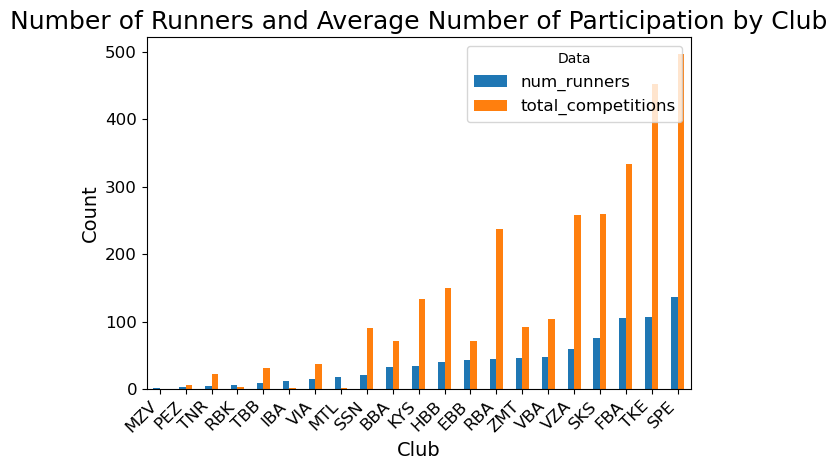

In [4]:
df = pd.DataFrame(y, columns=['club', 'num_runners', 'total_competitions'])

df_sorted = df.sort_values(by='num_runners')

# Create a bigger bar plot
plt.figure(figsize=(24, 16))  # Adjust the figsize as needed
ax = df_sorted.plot(x='club', kind='bar')   #stacked=True
plt.title('Number of Runners and Average Number of Participation by Club', fontsize=18)
plt.xlabel('Club', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Data', loc='upper right', fontsize=12)
plt.tight_layout()

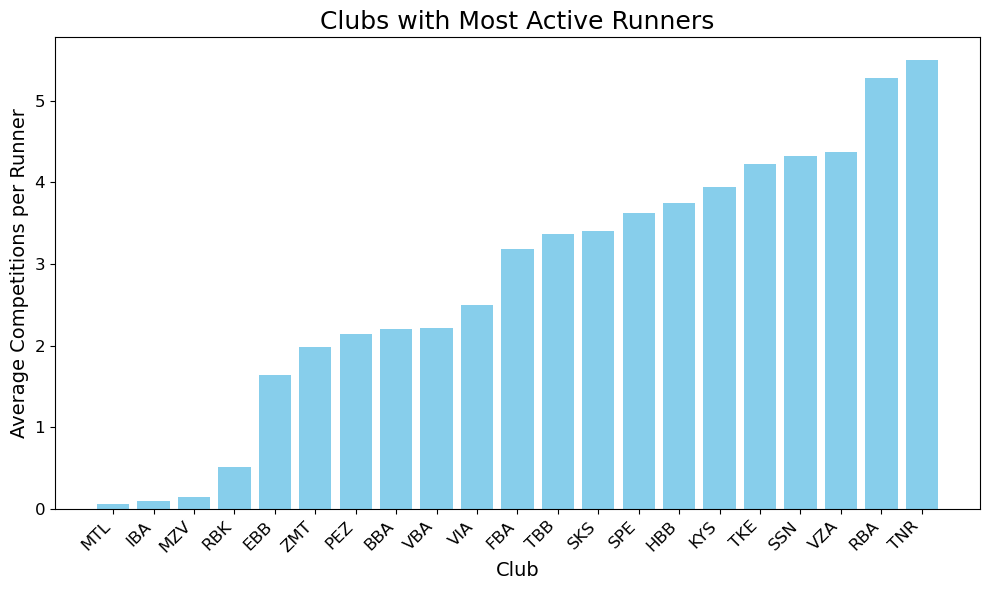

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'club', 'num_runners', and 'total_competitions'

# Calculate average number of competitions per runner
df['activity'] = df['total_competitions'] / df['num_runners']

# Sort clubs based on activity
df_sorted = df.sort_values(by='activity', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.bar(df_sorted['club'], df_sorted['activity'], color='skyblue')
plt.title('Clubs with Most Active Runners', fontsize=18)
plt.xlabel('Club', fontsize=14)
plt.ylabel('Average Competitions per Runner', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


In [6]:
df = pd.DataFrame(x, columns=['gender', 'club'])

# Calculate the count of each club
club_counts = df['club'].value_counts().reset_index()
club_counts.columns = ['club', 'count']

# Sort the DataFrame by club count
club_counts_sorted = club_counts.sort_values(by='count')

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='club', hue='gender', palette='pastel', order=club_counts_sorted['club'])
plt.title('Gender Distribution by Club (Ordered by Club Count)')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', loc='upper left')

plt.show()

ValueError: 2 columns passed, passed data had 3 columns

In [7]:
import pandas as pd

def fetch_gender_distribution(x):
    result = x
    
    if not result:
        return [['Club', 'Female', 'Male', 'Overall Female', 'Overall Male']]

    # Convert the result to a DataFrame
    df = pd.DataFrame(result, columns=['club', 'male_count', 'female_count'])

    # Calculate the percentage of males and females within each club
    df['total'] = df['male_count'] + df['female_count']
    df['male_percentage'] = (df['male_count'] / df['total']) * 100
    df['female_percentage'] = (df['female_count'] / df['total']) * 100

    # Sort the clubs based on the percentage of females
    df_sorted = df.sort_values(by='female_percentage', ascending=True)

    # Calculate overall percentages
    total_males = df['male_count'].sum()
    total_females = df['female_count'].sum()
    total_runners = total_males + total_females
    overall_male_percentage = (total_males / total_runners) * 100
    overall_female_percentage = (total_females / total_runners) * 100

    # Prepare data for Google Charts
    gender_data = [['Club', 'Female', 'Male', 'Overall Female', 'Overall Male']]
    for _, row in df_sorted.iterrows():
        gender_data.append([
            row['club'],
            row['female_percentage'],
            row['male_percentage'],
            overall_female_percentage,
            overall_male_percentage
        ])

    return gender_data

r=fetch_gender_distribution(x)
print(r)

[['Club', 'Female', 'Male', 'Overall Female', 'Overall Male'], ['PEZ', 0.0, 100.0, 42.0256111757858, 57.97438882421421], ['TNR', 25.0, 75.0, 42.0256111757858, 57.97438882421421], ['KYS', 26.47058823529412, 73.52941176470588, 42.0256111757858, 57.97438882421421], ['IBA', 27.27272727272727, 72.72727272727273, 42.0256111757858, 57.97438882421421], ['BBA', 28.125, 71.875, 42.0256111757858, 57.97438882421421], ['HBB', 35.0, 65.0, 42.0256111757858, 57.97438882421421], ['RBA', 35.55555555555556, 64.44444444444444, 42.0256111757858, 57.97438882421421], ['VZA', 37.28813559322034, 62.71186440677966, 42.0256111757858, 57.97438882421421], ['SSN', 38.095238095238095, 61.904761904761905, 42.0256111757858, 57.97438882421421], ['ZMT', 39.130434782608695, 60.86956521739131, 42.0256111757858, 57.97438882421421], ['FBA', 41.904761904761905, 58.0952380952381, 42.0256111757858, 57.97438882421421], ['TKE', 42.05607476635514, 57.943925233644855, 42.0256111757858, 57.97438882421421], ['SPE', 45.25547445255474

In [8]:
gender_counts = df.groupby(['club', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of females and males within each club
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Calculate the percentage of females and males within each club
female_percentage = gender_percentage['Žena']
male_percentage = gender_percentage['Muž']

# Sort the clubs based on the percentage of females
sorted_clubs = female_percentage.sort_values(ascending=True).index

# Reorder the DataFrame columns based on the sorted clubs
female_percentage_sorted = female_percentage.loc[sorted_clubs]
male_percentage_sorted = male_percentage.loc[sorted_clubs]

# Plot the stacked bar plot with percentage
plt.figure(figsize=(10,6))
p1 = plt.bar(female_percentage_sorted.index, female_percentage_sorted, color='#ff7f0e')
p2 = plt.bar(male_percentage_sorted.index, male_percentage_sorted, bottom=female_percentage_sorted, color='#1f77b4')
plt.title('Gender Distribution by Club (Ordered by Percentage of Females)')
plt.xlabel('Club')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='center')
plt.legend((p1[0], p2[0]), ('Female', 'Male'), loc='upper right')

plt.tight_layout()
plt.show()

KeyError: 'gender'

In [9]:
gender_counts = df.groupby(['club', 'gender']).size().unstack(fill_value=0)

# Calculate the total number of runners for each club
club_runners = df.groupby('club').size()

# Sort the clubs based on the total number of runners
sorted_clubs = club_runners.sort_values()

# Reorder the DataFrame columns based on the sorted clubs
gender_counts_sorted = gender_counts.reindex(sorted_clubs.index)

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
gender_counts_sorted.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution by Club (Ordered by Number of Runners)')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')

plt.show()

KeyError: 'gender'

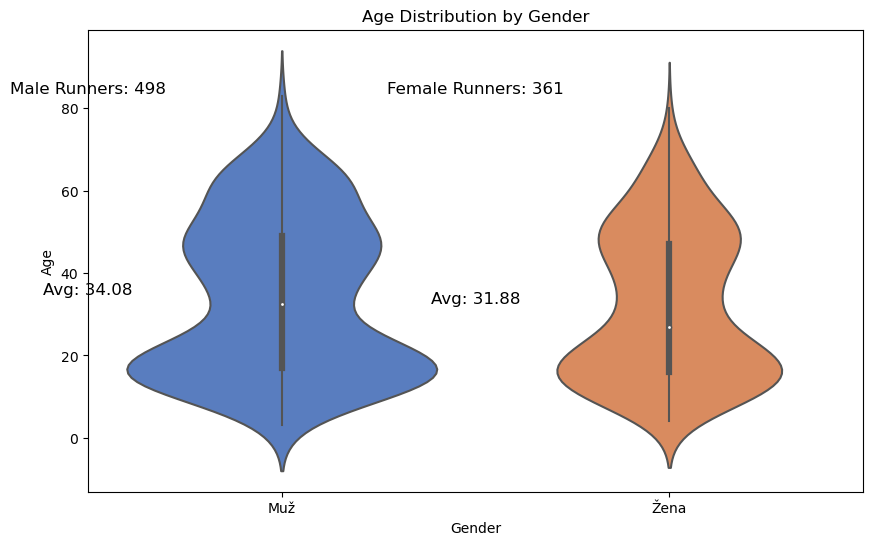

In [10]:



# Convert fetched data into a DataFrame
df = pd.DataFrame(gender_violin, columns=['age', 'gender'])

# Calculate average age and count male and female runners
male_data = df[df['gender'] == 'Muž']
female_data = df[df['gender'] == 'Žena']

# Calculate average age for male and female runners
average_male = male_data['age'].mean()
average_female = female_data['age'].mean()

# Count the number of male and female runners
male_count = male_data.shape[0]
female_count = female_data.shape[0]

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='age', data=df, palette='muted', scale='count')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Annotate the plot with average age and counts
plt.text(-0.5, average_male, f'Avg: {average_male:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(0.5, average_female, f'Avg: {average_female:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(-0.5, df['age'].max(), f'Male Runners: {male_count}', ha='center', va='bottom', fontsize=12)
plt.text(0.5, df['age'].max(), f'Female Runners: {female_count}', ha='center', va='bottom', fontsize=12)

plt.show()

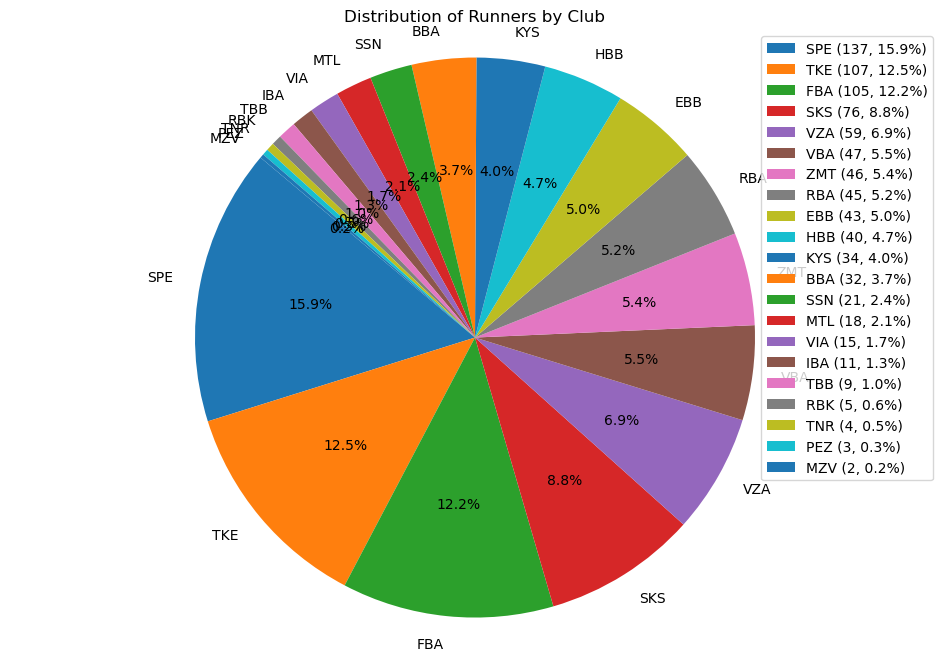

In [11]:
# Sort the data based on counts
clubs, counts = zip(*club)
sorted_data = sorted(zip(clubs, counts), key=lambda x: x[1], reverse=True)
clubs_sorted, counts_sorted = zip(*sorted_data)

# Calculate the total count of runners
total_count = sum(counts_sorted)

# Calculate the percentages and format them to one decimal place
percentages = [(count / total_count) * 100 for count in counts_sorted]

# Generate the labels with club names, counts, and percentages
labels = [f"{club} ({count}, {percent:.1f}%)" for club, count, percent in zip(clubs_sorted, counts_sorted, percentages)]

# Plot the pie plot
plt.figure(figsize=(12, 8))
plt.pie(counts_sorted, labels=clubs_sorted, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Runners by Club')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Generate the legend with labels including count and percentage
legend_labels = [f"{club} ({count}, {percent:.1f}%)" for club, count, percent in zip(clubs_sorted, counts_sorted, percentages)]
plt.legend(labels=legend_labels, loc="best")

plt.show()


['SPE ( 15.9%)', 'TKE ( 12.5%)', 'FBA ( 12.2%)', 'SKS ( 8.8%)', 'VZA ( 6.9%)', 'VBA ( 5.5%)', 'ZMT ( 5.4%)', 'RBA ( 5.2%)', 'EBB ( 5.0%)', 'HBB ( 4.7%)', 'KYS ( 4.0%)', 'BBA ( 3.7%)', 'SSN ( 2.4%)', 'MTL ( 2.1%)', 'VIA ( 1.7%)', 'IBA ( 1.3%)', 'Others ( 2.7%)']


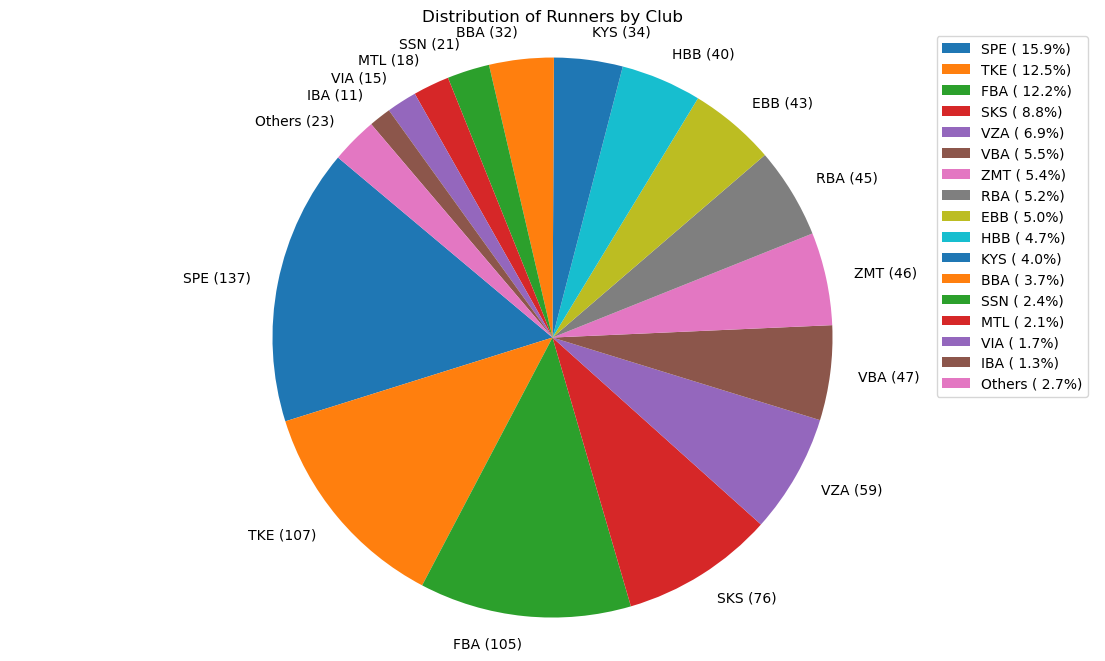

In [12]:
# Filter clubs with less than 10 runners
clubs, counts = zip(*club)
threshold = 10
filtered_data = [(club, count) for club, count in zip(clubs, counts) if count >= threshold]
other_count = sum(count for club, count in zip(clubs, counts) if count < threshold)

# Sort the remaining clubs by the number of runners
filtered_data.sort(key=lambda x: x[1], reverse=True)

# Add the "Others" category
if other_count > 0:
    filtered_data.append(("Others", other_count))

# Unzip the filtered data
filtered_clubs, filtered_counts = zip(*filtered_data)

# Calculate the total count of runners
total_count = sum(filtered_counts)

# Calculate the percentages and format them to one decimal place
percentages = [(count / total_count) * 100 for count in filtered_counts]

# Generate the labels with club names, counts, and percentages
labels = [f"{club} ({count})" for club, count, percent in zip(filtered_clubs, filtered_counts, percentages)]

# Plot the pie plot
plt.figure(figsize=(14, 8))
plt.pie(filtered_counts, labels=labels, autopct='', startangle=140)
plt.title('Distribution of Runners by Club')
plt.axis('equal')

# Generate the legend with labels including count and percentage
legend_labels = [f"{club} ( {percent:.1f}%)" for club, count, percent in zip(filtered_clubs, filtered_counts, percentages)]
print(legend_labels)
plt.legend(labels=legend_labels, loc="best")

plt.show()


In [13]:
from datetime import datetime
db = connect_db()
cursor = db.cursor()

da = "2020-01-01"

# Convert the date to SQLite date format
#da_sqlite = datetime.strptime(da, "%d.%m.%Y").strftime("%Y-%m-%d")

# Construct the SQL query to select dates after the target date
tryr = f"SELECT date FROM competitions WHERE date > '{da}'"
print(tryr)
cursor.execute(tryr)
t=cursor.fetchall()

print(t)

SELECT date FROM competitions WHERE date > '2020-01-01'
[('2020-08-29',), ('2020-08-30',), ('2020-09-05',), ('2020-09-05',), ('2020-09-18',), ('2020-09-19',), ('2020-09-20',), ('2020-09-26',), ('2020-09-27',), ('2021-06-19',), ('2021-06-19',), ('2021-07-31',), ('2021-08-01',), ('2021-08-01',), ('2021-08-02',), ('2021-09-04',), ('2021-09-05',), ('2021-09-11',), ('2021-09-12',), ('2021-09-25',), ('2021-10-09',), ('2022-04-02',), ('2022-04-03',), ('2022-04-30',), ('2022-05-14',), ('2022-05-15',), ('2022-05-21',), ('2022-06-11',), ('2022-06-25',), ('2022-06-26',), ('2022-07-29',), ('2022-07-30',), ('2022-07-30',), ('2022-07-31',), ('2022-09-03',), ('2022-09-04',), ('2022-10-01',), ('2022-10-02',), ('2022-10-14',), ('2022-10-15',), ('2022-10-16',), ('2023-03-18',), ('2023-03-19',), ('2023-04-01',), ('2023-04-02',), ('2023-04-29',), ('2023-05-01',), ('2023-04-30',), ('2023-04-30',), ('2023-05-14',), ('2023-05-20',), ('2023-09-09',), ('2023-09-10',), ('2023-09-23',), ('2023-10-06',), ('2023-1

{'BBA': 17, 'FBA': 6, 'HBB': 13, 'KYS': 1, 'RBA': 3, 'RBK': 9, 'SKS': 9, 'SPE': 11, 'SSN': 3, 'TKE': 19, 'VBA': 2, 'VIA': 3, 'VZA': 5, 'ZMT': 3}
{'BBA': 14.000000000000002, 'EBB': 0, 'FBA': 124.83333333333334, 'HBB': 21.538461538461537, 'IBA': 0, 'KYS': 238.0, 'MTL': 0, 'MZV': 0, 'PEZ': 0, 'RBA': 107.33333333333334, 'RBK': 3.8888888888888884, 'SKS': 59.11111111111111, 'SPE': 89.72727272727273, 'SSN': 49.0, 'TBB': 0, 'TKE': 40.1578947368421, 'TNR': 0, 'VBA': 168.0, 'VIA': 35.0, 'VZA': 86.8, 'ZMT': 109.66666666666667}
{'EBB': 0.0, 'IBA': 0.0, 'MTL': 0.0, 'MZV': 0.0, 'PEZ': 0.0, 'TBB': 0.0, 'TNR': 0.0, 'RBK': 1.2857142857142858, 'BBA': 2.4285714285714284, 'HBB': 1.8571428571428572, 'VIA': 0.42857142857142855, 'TKE': 2.7142857142857144, 'SSN': 0.42857142857142855, 'SKS': 1.2857142857142858, 'VZA': 0.7142857142857143, 'SPE': 1.5714285714285714, 'RBA': 0.42857142857142855, 'ZMT': 0.42857142857142855, 'FBA': 0.8571428571428571, 'VBA': 0.2857142857142857, 'KYS': 0.14285714285714285}


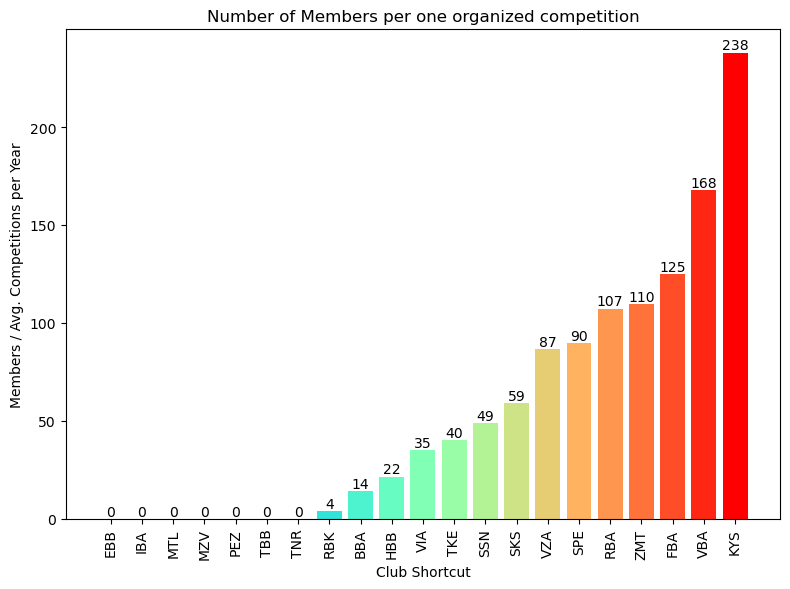

In [14]:
from datetime import datetime
db = connect_db()
cursor = db.cursor()
clubs_query = "SELECT shortcut, members FROM clubs"
cursor.execute(clubs_query)
club_data = cursor.fetchall()

#competitions_query = "SELECT org, COUNT(*) FROM competitions WHERE strftime('%Y', date) > 2020 GROUP BY org"

competitions_query = "SELECT org, COUNT(*) FROM competitions GROUP BY org"

cursor.execute(competitions_query)
competition_data = cursor.fetchall()


competition_counts = dict(competition_data)

print(competition_counts)

members_per_competition = {shortcut: members / (competition_counts.get(shortcut, 0) / 7) if (competition_counts.get(shortcut, 0) != 0) else 0 for shortcut, members in club_data}
print(members_per_competition)
members_per_competition = dict(sorted(members_per_competition.items(), key=lambda item: item[1]))

club_shortcuts = list(members_per_competition.keys())

competitions_per_year = {shortcut: competition_counts.get(shortcut, 0) / 7 for shortcut in club_shortcuts}

print(competitions_per_year)
# Extract club shortcuts and corresponding values
club_shortcuts = list(members_per_competition.keys())
values = list(members_per_competition.values())


# Generate labels with number of competitions per year for each club
labels = [f'{members_per_competition[shortcut]:.0f}' for shortcut in club_shortcuts]

plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(club_shortcuts)))  # Generate rainbow colors
bars = plt.bar(club_shortcuts, values, color=colors)

# Set custom labels
for label, bar in zip(labels, bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label,
             ha='center', va='bottom', rotation=0)

plt.xlabel('Club Shortcut')
plt.ylabel('Members / Avg. Competitions per Year')
plt.title('Number of Members per one organized competition')
plt.xticks(rotation=90, ha='center')

# Create legend
legend_labels = [f'{club} (Avg. Competitions: {competitions_per_year[club]:.2f})' for club in club_shortcuts]
#plt.legend(title='Clubs', loc='upper right')
#plt.legend(labels=legend_labels, loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()


[('BBA', 17), ('FBA', 6), ('HBB', 13), ('KYS', 1), ('RBA', 3), ('RBK', 9), ('SKS', 9), ('SPE', 11), ('SSN', 3), ('TKE', 19), ('VBA', 2), ('VIA', 3), ('VZA', 5), ('ZMT', 3)]


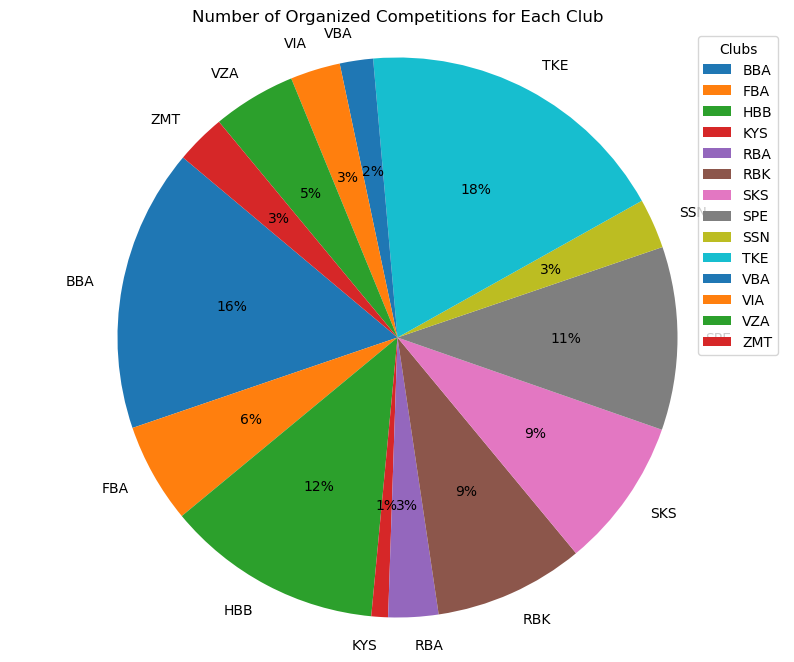

In [15]:

db = connect_db()
cursor = db.cursor()

# Query to retrieve the count of competitions organized by each club
competitions_query = "SELECT org, COUNT(*) FROM competitions  GROUP BY org"
cursor.execute(competitions_query)
competition_data = cursor.fetchall()
print(competition_data)
# Extract clubs and corresponding counts of competitions
clubs = [data[0] for data in competition_data]
counts = [data[1] for data in competition_data]


# Plot the pie plot
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=clubs, autopct='%1.0f%%', startangle=140)
plt.title('Number of Organized Competitions for Each Club')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(title='Clubs', loc='upper right')

plt.show()
# Close the connection
cursor.close()

<Figure size 1000x600 with 0 Axes>

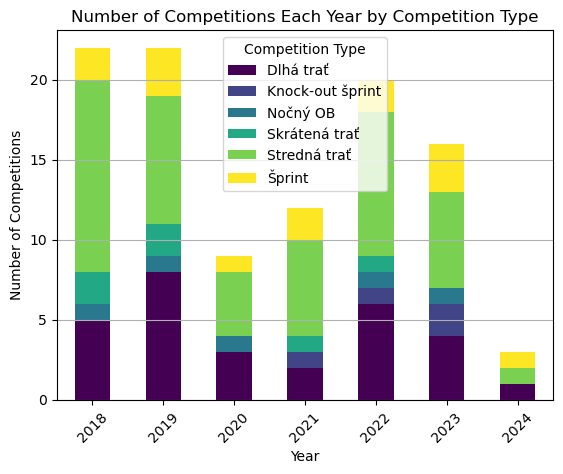

In [18]:

# Sample data
data = date_runner_type

# Convert date strings to datetime objects
dates = [date for date, _, _ in data]
dates = pd.to_datetime(dates, format='%Y-%m-%d')

# Extract years from datetime objects
years = [date.year for date in dates]

# Extract types of competitions
competition_types = [competition_type for _, _, competition_type in data]

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Competition Type': competition_types})

# Group by year and type of competition and count the number of competitions for each group
grouped_data = df.groupby([df['Date'].dt.year, 'Competition Type']).size().unstack().fillna(0)

# Plot the bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Competitions Each Year by Competition Type')
plt.xlabel('Year')
plt.ylabel('Number of Competitions')
plt.xticks(rotation=45)
plt.legend(title='Competition Type')
plt.grid(axis='y')
plt.show()


<Figure size 1000x600 with 0 Axes>

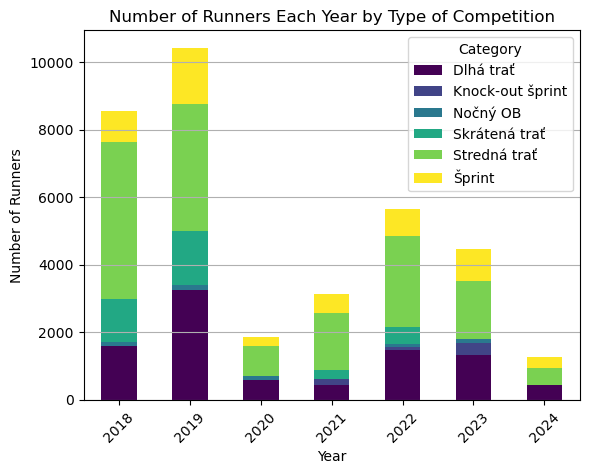

In [19]:

# Convert date strings to datetime objects
dates = [date for date, _, _ in date_runner_type]
dates = pd.to_datetime(dates, format='%Y-%m-%d')

# Extract years from datetime objects
years = [date.year for date in dates]

# Extract runners and categories
runners = [runners for _, runners, _ in date_runner_type]
categories = [category for _, _, category in date_runner_type]

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Runners': runners, 'Category': categories})

# Group by year and category and calculate total runners for each group
grouped_data = df.groupby([df['Date'].dt.year, 'Category'])['Runners'].sum().unstack()

# Plot the bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Runners Each Year by Type of Competition')
plt.xlabel('Year')
plt.ylabel('Number of Runners')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(axis='y')
plt.show()


In [18]:
def get_city_coordinates(city):
    # Connect to your SQLite database
    conn = sqlite3.connect('orienteering.db')

    # Query the coordinates for the given city
    query = f"SELECT lat, lng FROM cities WHERE city = '{city}'"
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchone()

    # Close the database connection
    conn.close()

    # Return the coordinates if found, otherwise return None
    if result:
        latitude, longitude = result
        return latitude, longitude
    else:
        return None

[809, 799, 793, 792, 787, 755, 641, 639, 568, 561, 506, 498, 498, 495, 490]


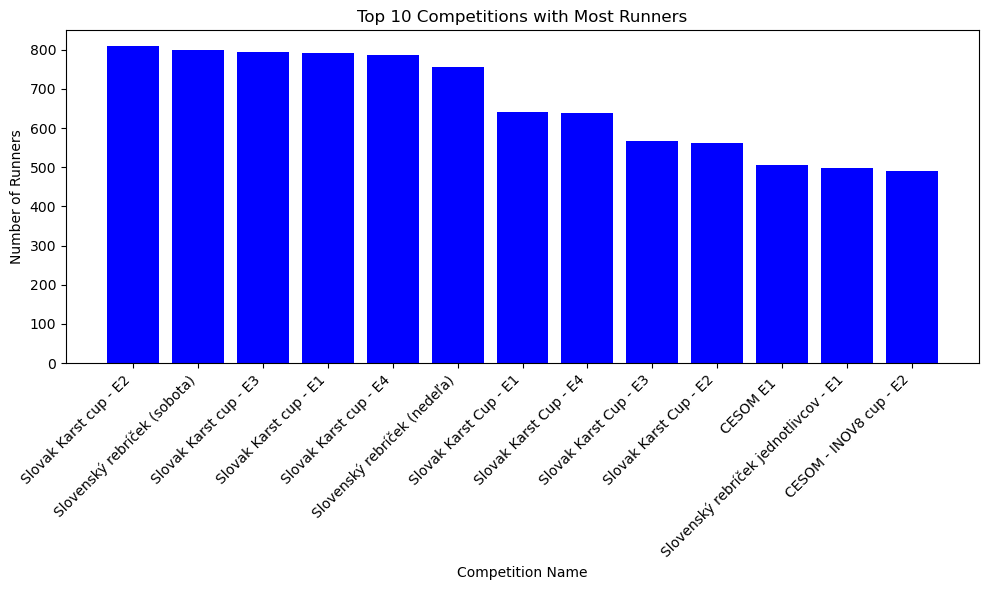

In [24]:
conn = sqlite3.connect('orienteering.db')

query = '''
SELECT name, runners 
FROM competitions 
ORDER BY runners DESC 
LIMIT 15
'''
cursor = conn.cursor()
cursor.execute(query)

competitions = cursor.fetchall()

# Close the database connection
conn.close()

# Extract data for plotting
names = [competition[0] for competition in competitions]
runners = [competition[1] for competition in competitions]
print(runners)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(names, runners, color='blue')
plt.xlabel('Competition Name')
plt.ylabel('Number of Runners')
plt.title('Top 10 Competitions with Most Runners')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

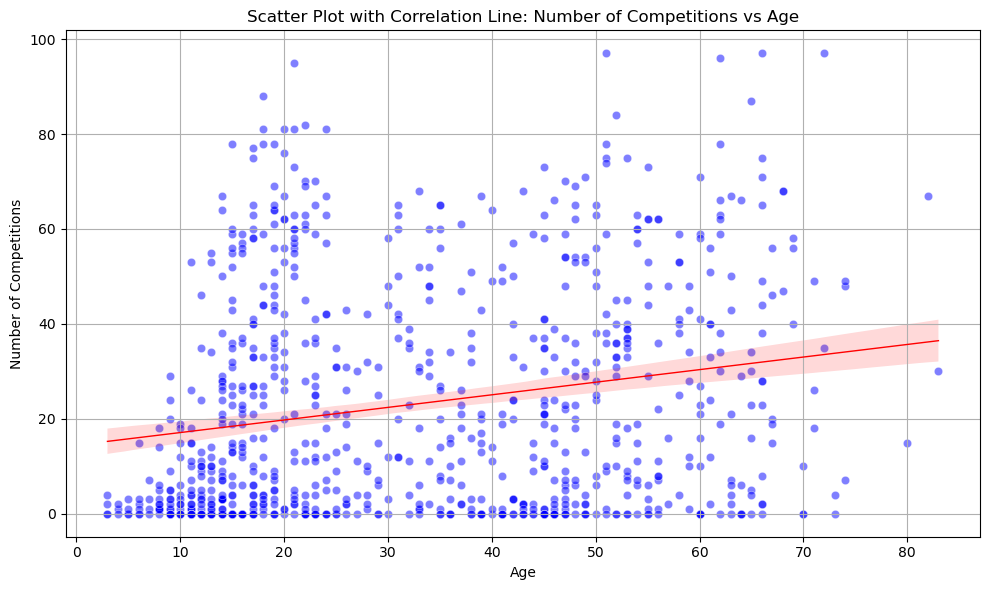

In [40]:
conn = sqlite3.connect('orienteering.db')


cursor = conn.cursor()
fetch_query = '''
SELECT age, num_competitions 
FROM runners
'''
df = pd.read_sql_query(fetch_query, conn)

# Close the database connection
conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='num_competitions', data=df, color='blue', alpha=0.5)

# Add a correlation line
sns.regplot(x='age', y='num_competitions', data=df, scatter=False, color='red', line_kws={"linewidth":1})

plt.xlabel('Age')
plt.ylabel('Number of Competitions')
plt.title('Scatter Plot with Correlation Line: Number of Competitions vs Age')
plt.grid(True)
plt.tight_layout()
plt.show()

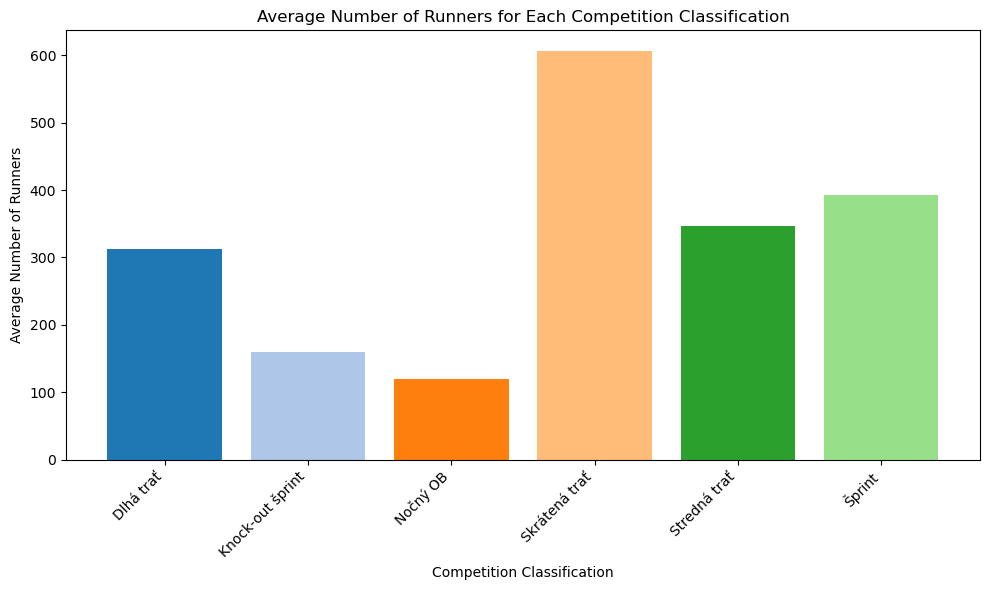

In [43]:
conn = sqlite3.connect('orienteering.db')
cursor = conn.cursor()

# Query to calculate average number of runners for each classification
average_runners_query = '''
SELECT classification, AVG(runners) AS avg_runners
FROM competitions
GROUP BY classification
'''

# Execute the query
cursor.execute(average_runners_query)
average_runners = cursor.fetchall()

# Close the database connection
conn.close()

# Extract classification and average number of runners from the result
classifications = [row[0] for row in average_runners]
avg_runners = [row[1] for row in average_runners]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifications, avg_runners, color=plt.cm.tab20.colors)
plt.xlabel('Competition Classification')
plt.ylabel('Average Number of Runners')
plt.title('Average Number of Runners for Each Competition Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

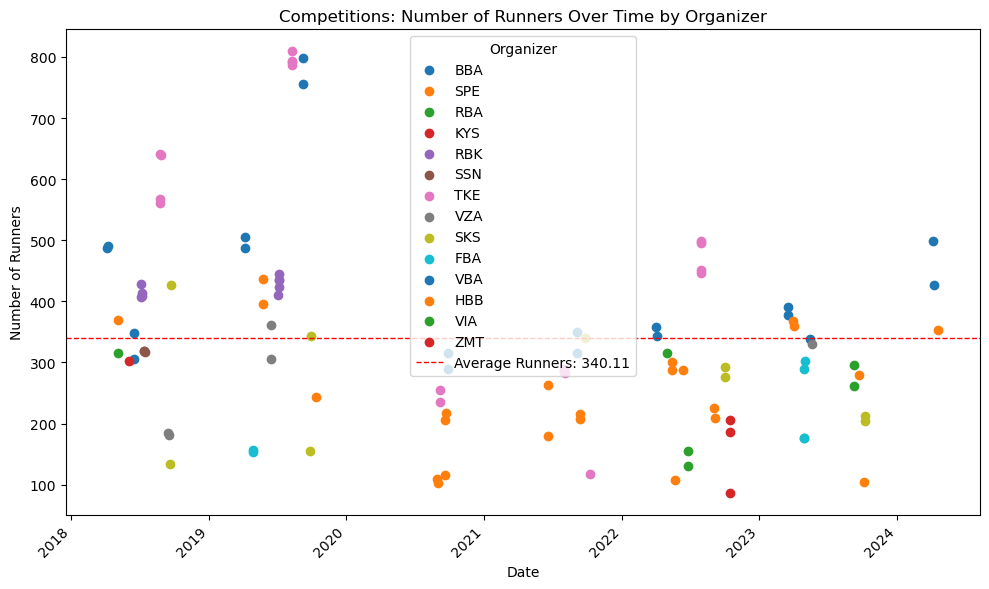

In [28]:
conn = sqlite3.connect('orienteering.db')

query = '''
SELECT date, runners, org 
FROM competitions 
ORDER BY date
'''
cursor = conn.cursor()
cursor.execute(query)

competitions = cursor.fetchall()

conn.close()

# Convert fetched data to a pandas DataFrame
df = pd.DataFrame(competitions, columns=['date', 'runners', 'org'])

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
average_runners = df['runners'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
for org in df['org'].unique():
    org_data = df[df['org'] == org]
    plt.scatter(org_data['date'], org_data['runners'], label=org)

plt.axhline(y=average_runners, color='red', linestyle='--', linewidth=1, label=f'Average Runners: {average_runners:.2f}')


plt.xlabel('Date')
plt.ylabel('Number of Runners')
plt.title('Competitions: Number of Runners Over Time by Organizer')
plt.legend(title='Organizer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\kovac\AppData\Local\Temp\ipykernel_12668\599818488.py:30: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='month_day_numeric', y='runners', hue='org', data=df, alpha=0.7, palette=sns.color_palette("bright"))


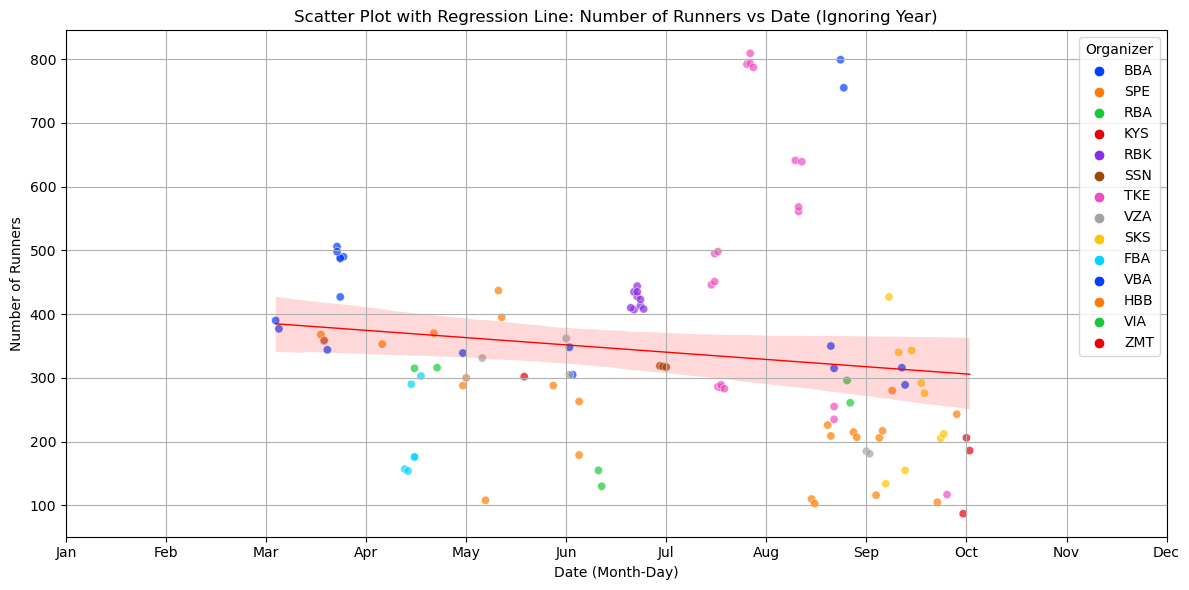

In [36]:
conn = sqlite3.connect('orienteering.db')


cursor = conn.cursor()
fetch_query = '''
SELECT date, runners, org
FROM competitions 
ORDER BY date
'''
cursor.execute(fetch_query)
competitions = cursor.fetchall()

# Close the database connection
conn.close()

# Convert fetched data to a pandas DataFrame
df = pd.DataFrame(competitions, columns=['date', 'runners', 'org'])

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and day (ignore the year)
df['month_day'] = df['date'].dt.strftime('%m-%d')

# Convert 'month_day' to a numeric format for plotting
df['month_day_numeric'] = df['date'].dt.month + df['date'].dt.day / 31

# Plot the data with seaborn to include a regression line and colors for each organizer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='month_day_numeric', y='runners', hue='org', data=df, alpha=0.7, palette=sns.color_palette("bright"))
sns.regplot(x='month_day_numeric', y='runners', data=df, scatter=False, color='red', line_kws={"linewidth":1})

plt.xlabel('Date (Month-Day)')
plt.ylabel('Number of Runners')
plt.title('Scatter Plot with Regression Line: Number of Runners vs Date (Ignoring Year)')
plt.xticks(
    ticks=[i + 15/31 for i in range(1, 13)], 
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.legend(title='Organizer')
plt.grid(True)
plt.tight_layout()
plt.show()

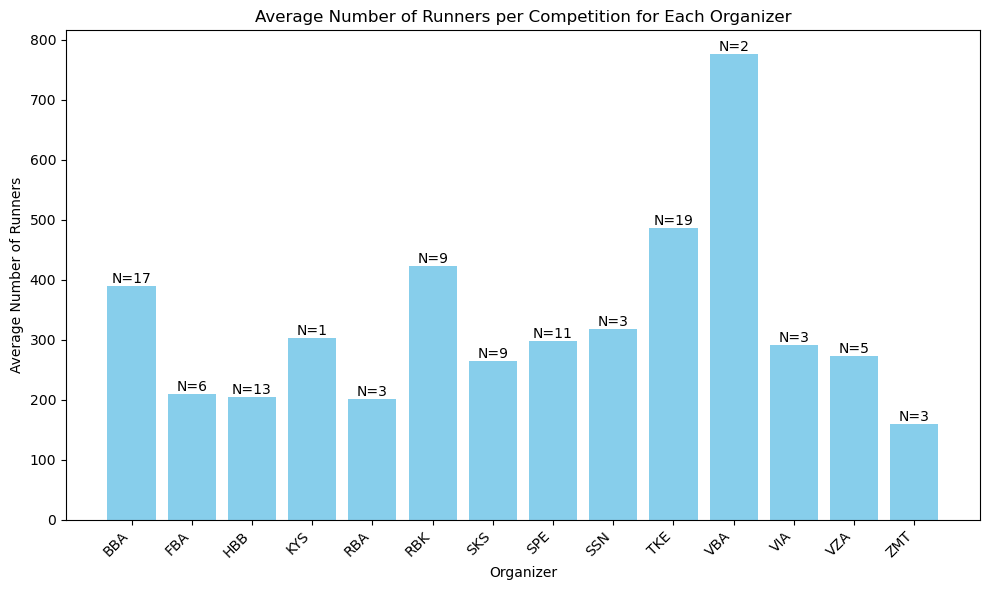

In [30]:
conn = sqlite3.connect('orienteering.db')

fetch_query = '''
SELECT org, runners 
FROM competitions 
'''
cursor = conn.cursor()
cursor.execute(fetch_query)
competitions = cursor.fetchall()

# Close the database connection
conn.close()

df = pd.DataFrame(competitions, columns=['org', 'runners'])

# Calculate the average number of runners and the count of competitions per organizer
average_runners_per_org = df.groupby('org')['runners'].mean().reset_index()
count_competitions_per_org = df.groupby('org')['runners'].count().reset_index()
count_competitions_per_org.columns = ['org', 'count']

# Merge the two DataFrames
summary_df = pd.merge(average_runners_per_org, count_competitions_per_org, on='org')

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_df['org'], summary_df['runners'], color='skyblue')

# Add the number of competitions on top of each column
for bar, count in zip(bars, summary_df['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'N={count}', ha='center', va='bottom')

plt.xlabel('Organizer')
plt.ylabel('Average Number of Runners')
plt.title('Average Number of Runners per Competition for Each Organizer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

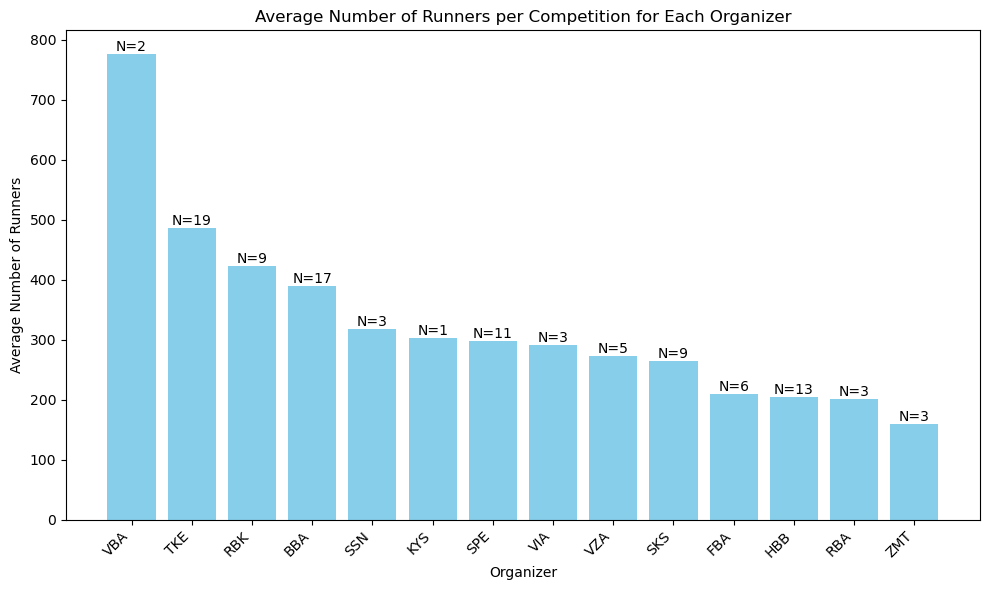

In [37]:
conn = sqlite3.connect('orienteering.db')

# Define the fetch query
fetch_query = '''
SELECT org, runners 
FROM competitions 
'''
# Execute the query
cursor = conn.cursor()
cursor.execute(fetch_query)
competitions = cursor.fetchall()

# Close the database connection
conn.close()

# Convert fetched data to a pandas DataFrame
df = pd.DataFrame(competitions, columns=['org', 'runners'])

# Calculate the average number of runners per competition for each organizer
average_runners_per_org = df.groupby('org')['runners'].mean().reset_index()
average_runners_per_org = average_runners_per_org.sort_values(by='runners', ascending=False)

# Calculate the count of competitions per organizer
count_competitions_per_org = df.groupby('org')['runners'].count().reset_index()
count_competitions_per_org.columns = ['org', 'count']

# Merge the two DataFrames
summary_df = pd.merge(average_runners_per_org, count_competitions_per_org, on='org')

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_df['org'], summary_df['runners'], color='skyblue')

# Add the number of competitions on top of each column
for bar, count in zip(bars, summary_df['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'N={count}', ha='center', va='bottom')

plt.xlabel('Organizer')
plt.ylabel('Average Number of Runners')
plt.title('Average Number of Runners per Competition for Each Organizer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
import folium
import sqlite3
import re

# Connect to your SQLite database
conn = sqlite3.connect('orienteering.db')

# Query the club data from the 'clubs' table
clubs_data = pd.read_sql_query("SELECT * FROM clubs", conn)

# Create a Folium map centered around Slovakia
slovakia_map = folium.Map(location=[48.7, 19.5], zoom_start=8)

pattern = r'\b\d{5}\b\s(.*)$'

# Add a marker for each club
for index, row in clubs_data.iterrows():
    print(row)
    club_name = row['name']
    city = row['city']
    if re.search(pattern, city)==None:
        city="Stupava"
    else:
        city = re.search(pattern, city).group(1) 
    if '-' in city:
        city=city.split('-')[0].strip()
    members = row['members']
    location = get_city_coordinates(city)  # Define a function to get the coordinates for each city
    if location:
        folium.CircleMarker(location=location, radius=members / 2, color='blue', fill=True, fill_color='blue').add_to(slovakia_map)
        #folium.Marker(location=location, popup=f'{club_name} ({city})').add_to(slovakia_map)

# Save the map to an HTML file
slovakia_map.save('clubs_map.html')

# Display the map
slovakia_map

shortcut                                                  BBA
name                             Klub orientačného behu KOBRA
members                                                    34
city        Pod Rovnicami 41, 84104 Bratislava - mestská č...
Name: 0, dtype: object
shortcut                                       EBB
name        Telovýchovná jednota Slávia Ekonóm UMB
members                                         46
city          Tajovského 10, 97590 Banská Bystrica
Name: 1, dtype: object
shortcut                             FBA
name             ŠK Farmaceut Bratislava
members                              107
city        Orechová  10, 900 31 Stupava
Name: 2, dtype: object
shortcut                                  HBB
name                ŠK HADVEO Banská Bystrica
members                                    40
city        Gorkého 35, 97404 Banská Bystrica
Name: 3, dtype: object
shortcut                                            IBA
name                     Telovýchovná jednota Ioan 1